#**DSE 315/615 - Analysis and Book Genre Prediction**

# Overview

The goal of our project is to predict the genre of the book. For this purpose I am using NLP. We will proceed by doing some exploratory analysis on our dataset and then finally build our model.

## Background and prior work

Text classification is playing a vital role in current era. Its requirement is increasing day by day
because of increase of text data as number of digital users are increasing rapidly. As a result, machine learning algorithms are used to classify certain text data, resulting in better predictions and accuracy. By constructing a data set with proper structure and data, the genre is predicted by the title and summary of the book.  The main focus here was to classify a book by genre using machine learning algorithms.

Link of some background work done :

https://github.com/chikne97/Book-Genre-Prediction

https://www.kaggle.com/code/lomero/aann-22-23-lab-07-training

#Research Question

Is there any relation of sypnosis of the book with the genre of the book?  How can be predict the genre of book by  using the sypnosis of the book?

# Dataset


Dataset Name: data.csv

Link to the dataset: https://www.kaggle.com/datasets/athu1105/book-genre-prediction

Number of observations: 4657 x 4

Description of the dataset:

* Index - Index of every row.

* Title - Title of the Book .

* Genre - Genre of the Book

* Summary - Synopsis of the Book.




#Setup

In [22]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [23]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno #For missing value visualization

import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time

In [25]:
#For NLP
import re
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
#For Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [27]:
#For Modelling Purpose
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Importing Data

In [29]:
data = pd.read_csv('/content/data.csv')

#Descriptive Analysis

In [30]:
data.head()

index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...

In [ ]:
data.tail()

index                              title    genre  \
4652   4652                            Hounded  fantasy   
4653   4653  Charlie and the Chocolate Factory  fantasy   
4654   4654                         Red Rising  fantasy   
4655   4655                          Frostbite  fantasy   
4656   4656                           Radiance  fantasy   

                                                summary  
4652  Atticus O’Sullivan, last of the Druids, lives ...  
4653  Charlie Bucket's wonderful adventure begins wh...  
4654  "I live for the dream that my children will be...  
4655  Rose loves Dimitri, Dimitri might love Tasha, ...  
4656  The Prince of no value\nBrishen Khaskem, princ...

In [ ]:
data.shape

(4657, 4)

In [ ]:
data.info

<bound method DataFrame.info of       index                              title    genre  \
0         0                  Drowned Wednesday  fantasy   
1         1                      The Lost Hero  fantasy   
2         2          The Eyes of the Overworld  fantasy   
3         3                    Magic's Promise  fantasy   
4         4                     Taran Wanderer  fantasy   
...     ...                                ...      ...   
4652   4652                            Hounded  fantasy   
4653   4653  Charlie and the Chocolate Factory  fantasy   
4654   4654                         Red Rising  fantasy   
4655   4655                          Frostbite  fantasy   
4656   4656                           Radiance  fantasy   

                                                summary  
0      Drowned Wednesday is the first Trustee among ...  
1      As the book opens, Jason awakens on a school ...  
2      Cugel is easily persuaded by the merchant Fia...  
3      The book opens with 

In [ ]:
data.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

The number of unique value of index ,title and summary are not matching .It means there are duplicate values in the dataset.

In [ ]:
data.isnull().sum()

index      0
title      0
genre      0
summary    0
dtype: int64

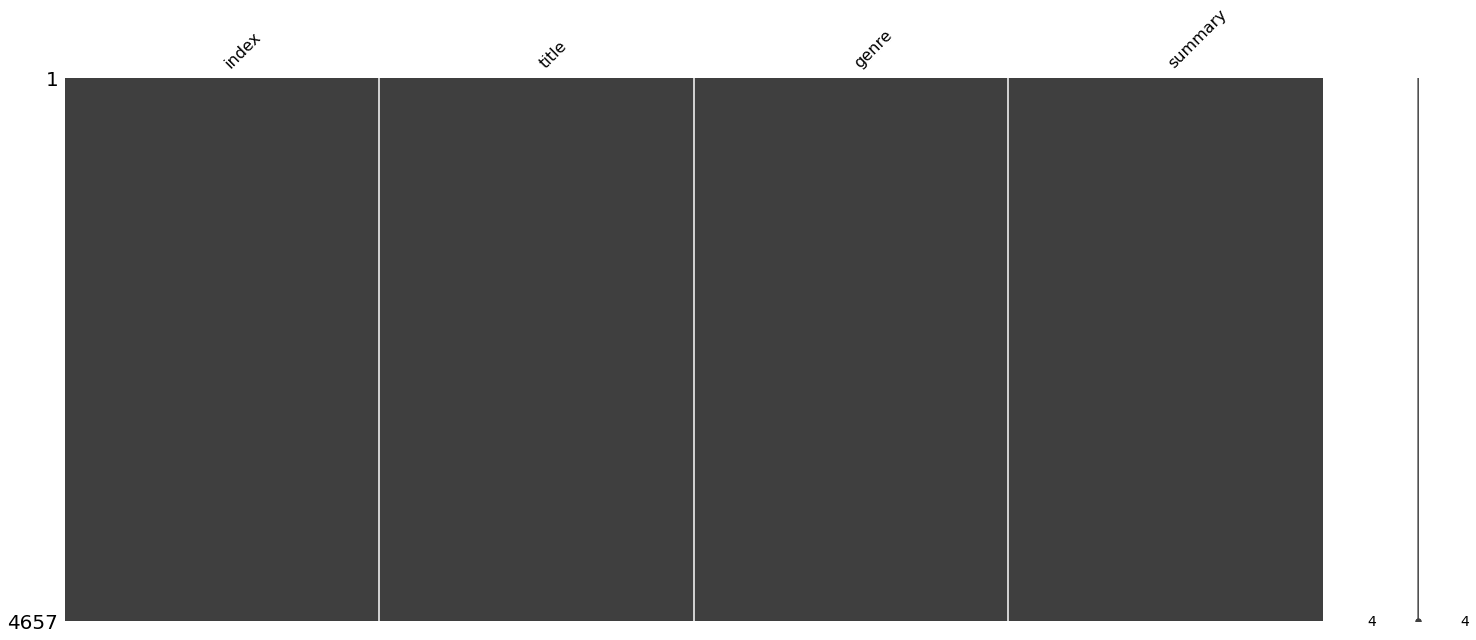

In [ ]:
# Visualising the null values
msno.matrix(data)

Our dataset contains no null values.

In [ ]:
data['genre'].describe()

count         4657
unique          10
top       thriller
freq          1023
Name: genre, dtype: object

Clearly there are 10 unique values in Genre where top one is Thriller having frequency of 1023

#Data Cleaning

In [31]:
data.drop('index',inplace = True,axis = 1)
data.head()

title    genre  \
0          Drowned Wednesday  fantasy   
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...

In [32]:
#Let's see how many rows have duplicate summaries.
data[data.duplicated('summary', keep=False)].sort_values('summary')

title     genre  \
338                                The Caverns of Kalte   fantasy   
1574            Guardians of Ga'Hoole Book 4: The Siege   history   
2633                                    Nothing to Lose  thriller   
2936                                         Conviction  thriller   
3001  Guns, Germs, and Steel: The Fates of Human Soc...   history   
...                                                 ...       ...   
4503                                            Dracula   fantasy   
3437                   Homo Deus: A History of Tomorrow   science   
3030                   Homo Deus: A History of Tomorrow   history   
3365                                              Kulti   romance   
3561                                              Kulti    sports   

                                                summary  
338                                          ==Receptio  
1574                                         ==Receptio  
2633   As described by Sherryl Connelly of the New Y...  
2936   As described by Sherryl Connelly of the New Y...  
3001  "Diamond has written a book of remarkable scop...  
...                                                 ...  
4503  You can find an alternative cover edition for ...  
3437  Yuval Noah Harari, author of the critically-ac...  
3030  Yuval Noah Harari, author of the critically-ac...  
3365  “Trust me, I’ve wanted to punch you in the fac...  
3561  “Trust me, I’ve wanted to punch you in the fac...  

[228 rows x 3 columns]

There are 228 rows having duplicate summary.

In [33]:
data[data.duplicated('title', keep=False)].sort_values('title')

title     genre  \
1237             1st to Die     crime   
3771             1st to Die  thriller   
3521  2001: A Space Odyssey   science   
827   2001: A Space Odyssey   science   
1295             2nd Chance     crime   
...                     ...       ...   
2416    Wolves of the Calla    horror   
2824        Worth Dying For  thriller   
3774        Worth Dying For  thriller   
3633                   Zack    sports   
3617                   Zack    sports   

                                                summary  
1237   The prologue introduces main character Inspec...  
3771  Four crime-solving friends face off against a ...  
3521  On the Moon, an enigma is uncovered.\n\nSo gre...  
827    In the background to the story in the book, a...  
1295   Homicide Lieutenant Lindsay Boxer is still re...  
...                                                 ...  
2416   After escaping the alternate Topeka and the e...  
2824   On his way to Virginia to meet Susan, the CO ...  
3774  There’s deadly trouble in the corn county of N...  
3633  Rising star Zack Grantham has been stuck in a ...  
3617  Rising star Zack Grantham has been stuck in a ...  

[680 rows x 3 columns]

There are 680 rows with duplicate titles.

The duplicate values may come because of some error in processing the data. For further implementation lets remove these duplicate values.

In [34]:
data = data.drop_duplicates('title')
data = data.drop_duplicates('summary')
data.shape

(4294, 3)

Removing stopwords, html tags, punctuations, multiple spaces etc from the text which is unnecessary and might create problem while modelling.

In [35]:
#cleaning unecessary text from the string 
def clean(text):
    text = text.lower() #Converting to lowerCase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation
    
    text_tokens = word_tokenize(text) #removing stopwords
    tw = [word for word in text_tokens if not word in stopwords.words('english')]
    text = (" ").join(tw)
    
    splt = text.split(' ')
    \
    output = [x for x in splt if len(x) > 3] #removing words with length<=3
    text = (" ").join(output)
    
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character 
    text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    return text

In [40]:
#text cleaning
data['summary'] = data['summary'].apply(clean)
data['title'] = data['title'].apply(clean)

In [41]:
data['genre'].value_counts()

thriller      866
fantasy       806
science       610
history       596
horror        546
crime         496
psychology     99
romance        98
travel         98
sports         79
Name: genre, dtype: int64

# Exploratory Analysis

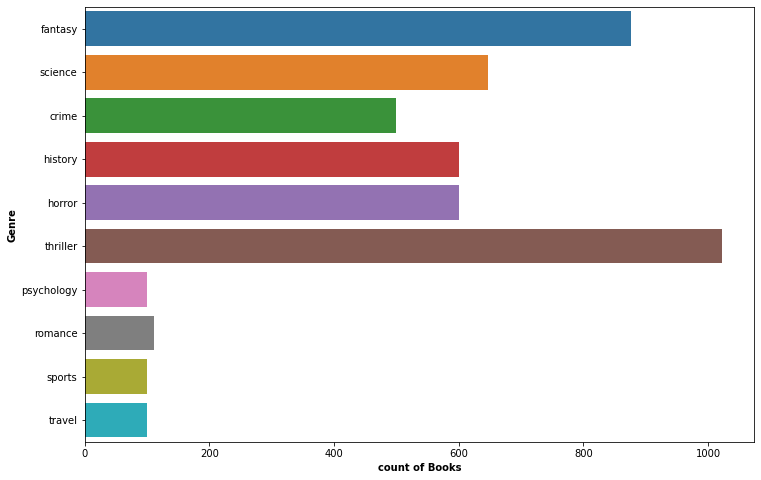

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8) 
# count plot on single categorical variable
ax=sns.countplot(y ='genre', data = data , orient= 'v')
abs_values = data['genre'].value_counts(ascending=False).values
ax.set_xlabel('count of Books', 
               fontweight ='bold')
ax.set_ylabel('Genre', 
               fontweight ='bold')
# Show the plot
plt.show()

#WordCloud

WordCloud is used to highlight the significant textual data points.

In [ ]:
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(summary)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
def make_string(genre):
    s = ""
    for row_index,row in data.iterrows():
        if(row['genre'] == genre):
            s+=(row['summary']+' ')
    return s
    

thriller


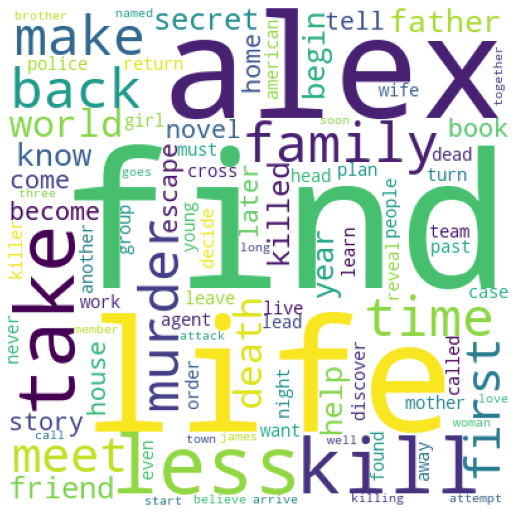

fantasy


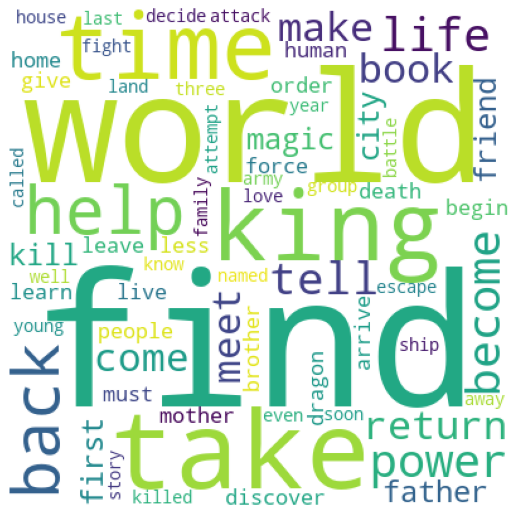

science


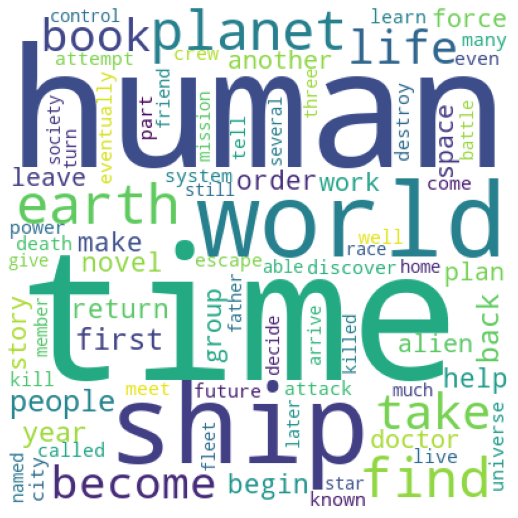

history


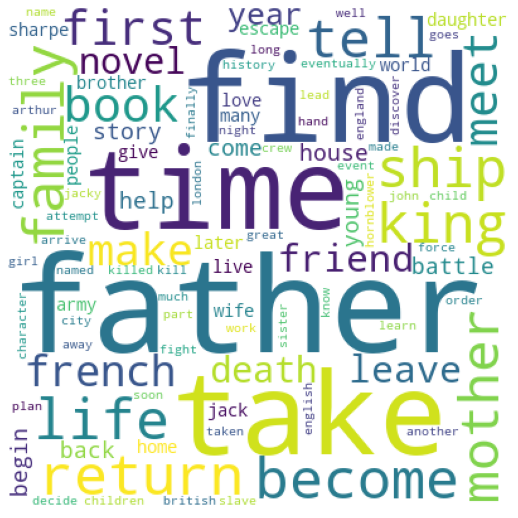

horror


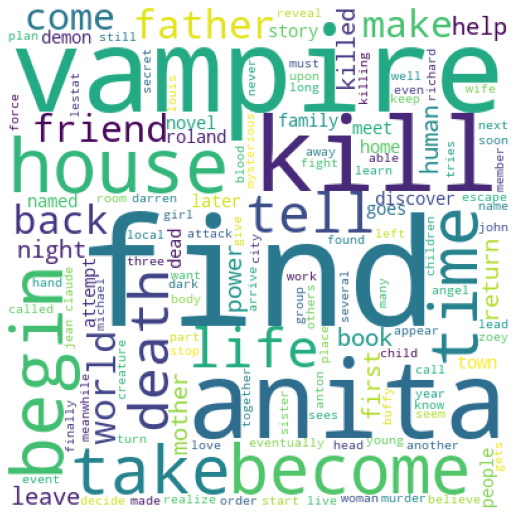

crime


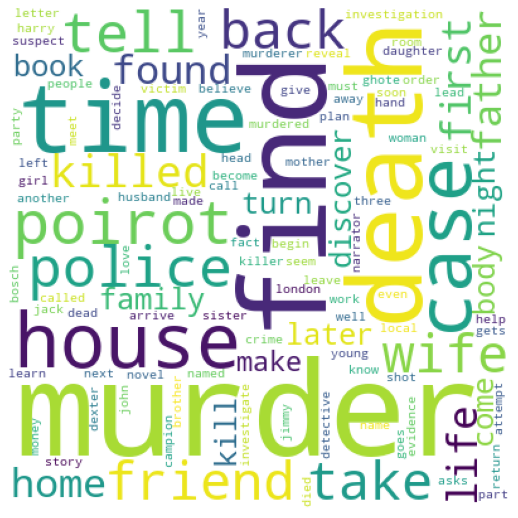

romance


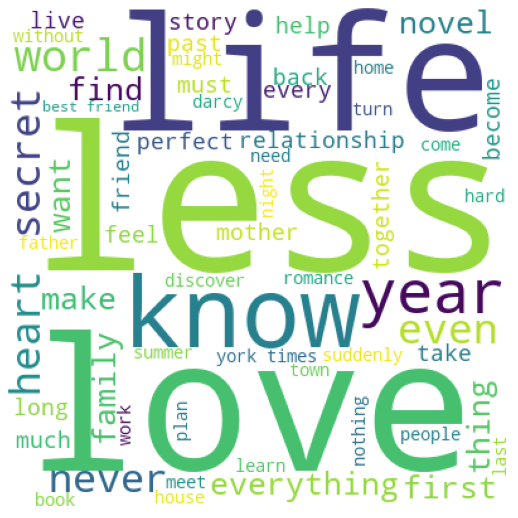

psychology


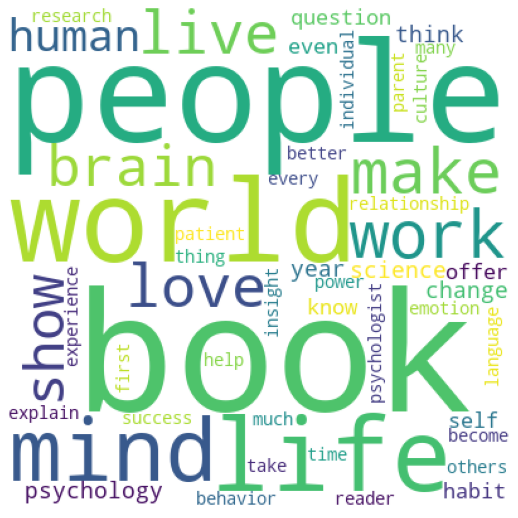

sports


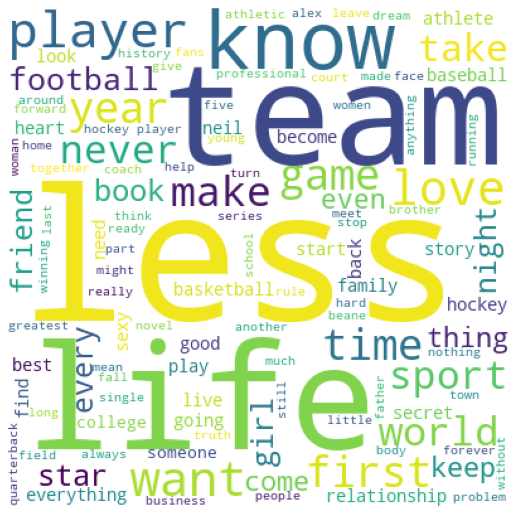

travel


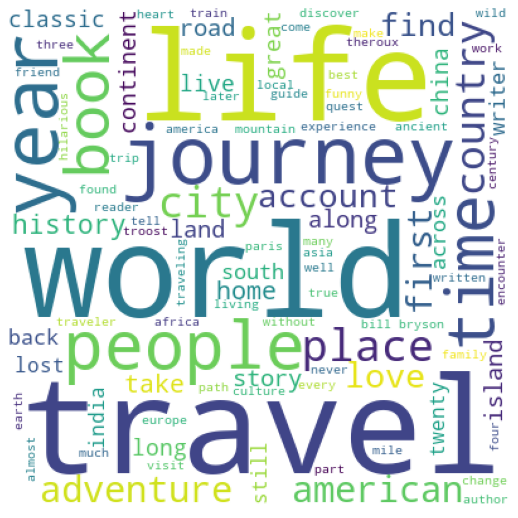

In [ ]:
genre = ['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel']
for Genre in genre:
    summary = make_string(Genre)
    print_wordCloud(Genre,summary)

In [ ]:
def print_wordCloud(genre,title):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(title)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
def make_string(genre):
    s = ""
    for row_index,row in data.iterrows():
        if(row['genre'] == genre):
            s+=(row['title']+' ')
    return s

thriller


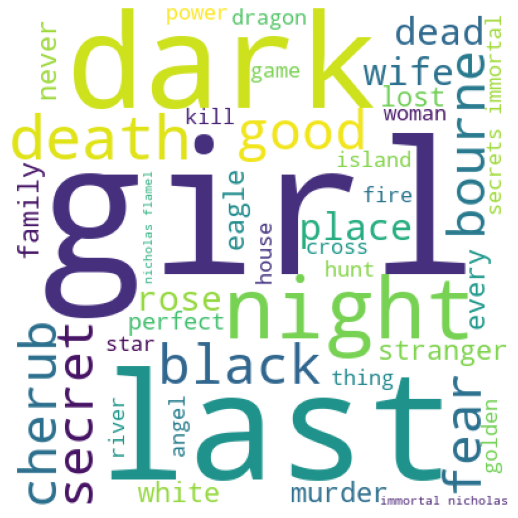

fantasy


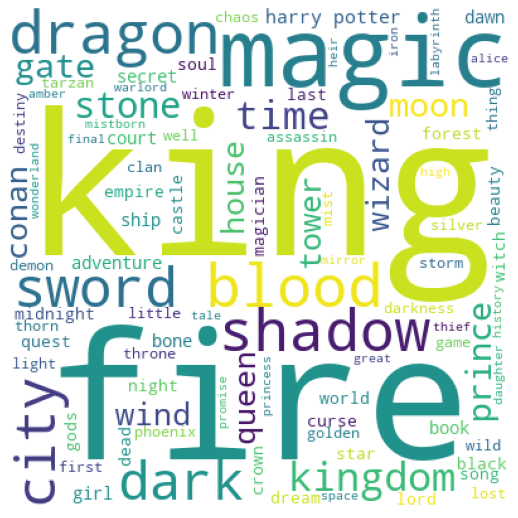

science


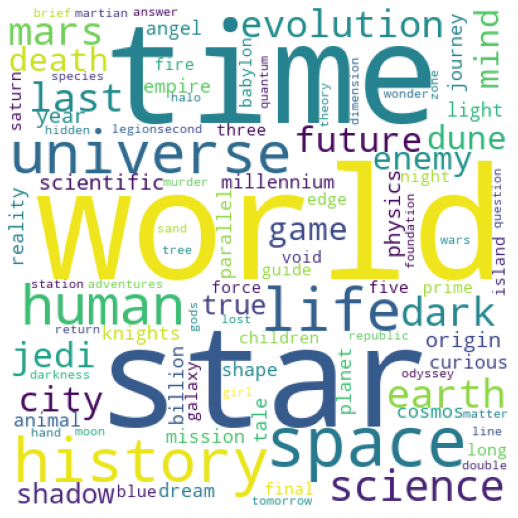

history


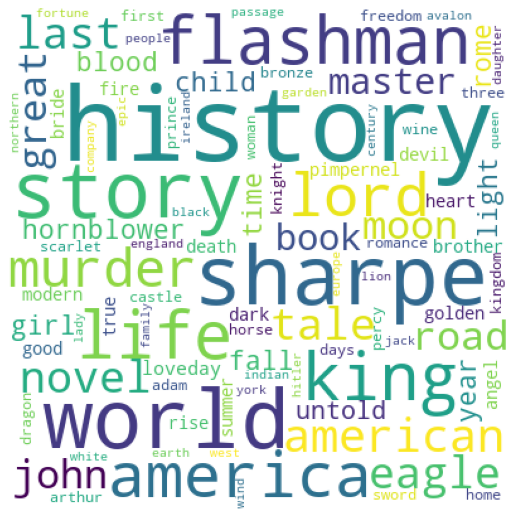

horror


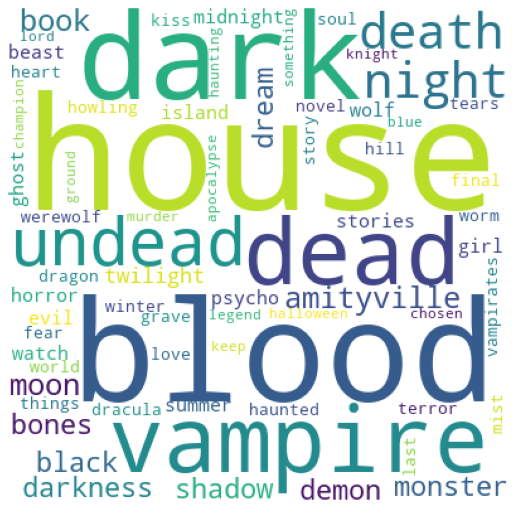

crime


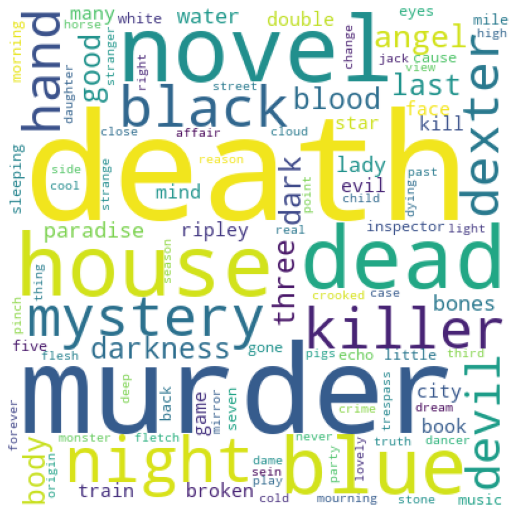

romance


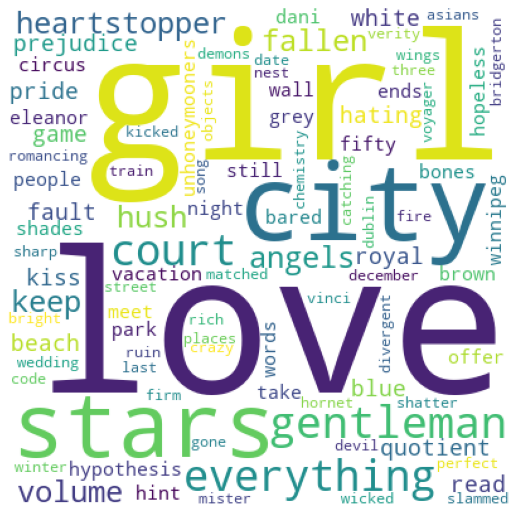

psychology


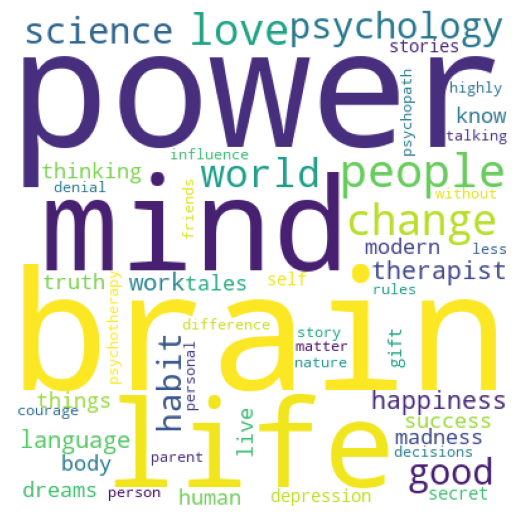

sports


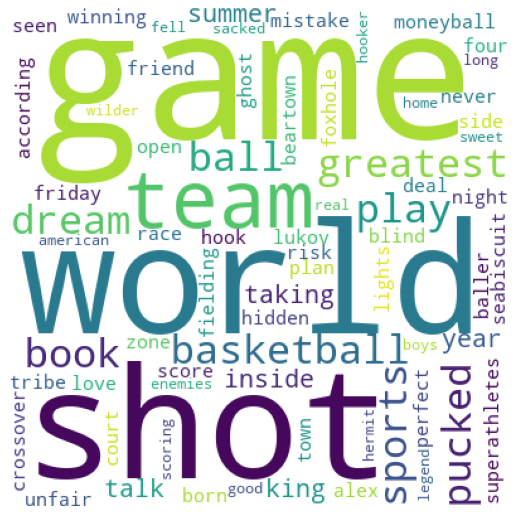

travel


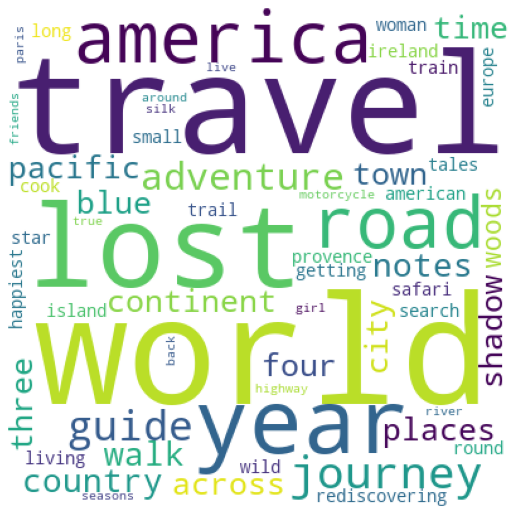

In [ ]:
genre = ['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel']
for Genre in genre:
    title = make_string(Genre)
    print_wordCloud(Genre,title)

#Data Preprocessing

In [42]:
df=data[data['summary'].apply(len)>300]
#df.sort_values(by=['length'])
df

title    genre  \
0                             drowned wednesday  fantasy   
1                                     lost hero  fantasy   
2                                eyes overworld  fantasy   
3                                 magic promise  fantasy   
4                                taran wanderer  fantasy   
...                                         ...      ...   
4650                                wintersmith  fantasy   
4651  fantastic beasts find original screenplay  fantasy   
4652                                    hounded  fantasy   
4654                                     rising  fantasy   
4656                                   radiance  fantasy   

                                                summary  
0     drowned wednesday first trustee among morrow d...  
1     book opens jason awakens school unable remembe...  
2     cugel easily persuaded merchant fianosther att...  
3     book opens herald mage vanyel returning countr...  
4     taran gurgi returned caer dallben following ev...  
...                                                 ...  
4650  tiffany aching trainee witch working seriously...  
4651  rowling screenwriting debut captured exciting ...  
4652  atticus sullivan last druids lives peacefully ...  
4654  live dream children born free says like land f...  
4656  prince value brishen khaskem prince lived cont...  

[3780 rows x 3 columns]

TF-IDF stands for term frequency-inverse document frequency and  that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus). This step is used to create a short summary of  more weightage words from the summary of each book.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
def short_sum(s):
  s=s.split('\n')
  s=pd.DataFrame(s)
  s.columns =['summary']
  corpus = s[s['summary'].apply(len)>70]
  vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
  vectorizer.fit_transform(corpus['summary'])
  x=vectorizer.get_feature_names_out()
  return x
#This returns an array of most significant words in a summary.

Creating a new column of short summary.

In [45]:
df['short_sum'] = [' '.join(short_sum(y)) for y in df['summary']]
df.sample(10)

title       genre  \
2645                                enemies    thriller   
4618                             kings wyld     fantasy   
3206            mistook wife clinical tales  psychology   
3452  genome autobiography species chapters     science   
2993                              blasphemy    thriller   
3094        benjamin franklin american life     history   
580                        marvelous effect     science   
1285                          paradise city       crime   
2870                       caravan vaccarès    thriller   
4185                 neither travels europe      travel   

                                                summary  \
2645  special activities division operation officer ...   
4618  clay cooper band best best meanest dirtiest fe...   
3206  lost knows lost lost self—himself—he know long...   
3452  ridley leaps chromosome chromosome handy summa...   
2993  isabella powerful particle accelerator constru...   
3094  benjamin franklin founding father winks ambiti...   
580   novel tells story year louis proof african ame...   
1285  paradise city story giancarlo manto east bronx...   
2870  europe even behind iron curtain gypsies make a...   
4185  bill bryson first travel book lost continent u...   

                                              short_sum  
2645  able activities allies associates attack attem...  
4618  apart band bandmate besieged best blood brave ...  
3206  adapt artistic autistic bizarre brilliant dism...  
3452  addresses affect ancestors answers application...  
2993  accelerator admits agent apparently arizona ar...  
3094  albany america american combined comfort commo...  
580   abilities action african american author best ...  
1285  american battle bronx canceling capri city con...  
2870  annual aristocrat bowman caravan cecile center...  
4185  acclaimed asia attempting backpack bear book b...

In [46]:
#Further cleaning of this new short summary column.
df['short_sum'] = df['short_sum'].apply(clean)

In [ ]:
df

title    genre  \
0                             drowned wednesday  fantasy   
1                                     lost hero  fantasy   
2                                eyes overworld  fantasy   
3                                 magic promise  fantasy   
4                                taran wanderer  fantasy   
...                                         ...      ...   
4650                                wintersmith  fantasy   
4651  fantastic beasts find original screenplay  fantasy   
4652                                    hounded  fantasy   
4654                                     rising  fantasy   
4656                                   radiance  fantasy   

                                                summary  \
0     drowned wednesday first trustee among morrow d...   
1     book opens jason awakens school unable remembe...   
2     cugel easily persuaded merchant fianosther att...   
3     book opens herald mage vanyel returning countr...   
4     taran gurgi returned caer dallben following ev...   
...                                                 ...   
4650  tiffany aching trainee witch working seriously...   
4651  rowling screenwriting debut captured exciting ...   
4652  atticus sullivan last druids lives peacefully ...   
4654  live dream children born free says like land f...   
4656  prince value brishen khaskem prince lived cont...   

                                              short_sum  
0     able arthur begins border called carp catapill...  
1     aeolus annabeth aphrodite arrive arrives artem...  
2     1974 1983 agrees alien arduous attached attemp...  
3     abused actually armsmaster asked assists attac...  
4     aeddan amulet angharad annlaw assistance band ...  
...                                                 ...  
4650  aching actions attention consequences cracklin...  
4651  addition adventure arrives author beasts belov...  
4652  actuality angry answerer arizona arse atticus ...  
4654  believing best betrayed better blood born brin...  
4656  agrees alliance apart aristocrat bast beautifu...  

[3780 rows x 4 columns]

In [ ]:
df.tail()

title    genre  \
4650                                wintersmith  fantasy   
4651  fantastic beasts find original screenplay  fantasy   
4652                                    hounded  fantasy   
4654                                     rising  fantasy   
4656                                   radiance  fantasy   

                                                summary  \
4650  tiffany aching trainee witch working seriously...   
4651  rowling screenwriting debut captured exciting ...   
4652  atticus sullivan last druids lives peacefully ...   
4654  live dream children born free says like land f...   
4656  prince value brishen khaskem prince lived cont...   

                                              short_sum  
4650  aching actions attention consequences cracklin...  
4651  addition adventure arrives author beasts belov...  
4652  actuality angry answerer arizona arse atticus ...  
4654  believing best betrayed better blood born brin...  
4656  agrees alliance apart aristocrat bast beautifu...

#Building the Model

In [39]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.columns

Index(['title', 'genre', 'summary', 'short_sum'], dtype='object')

In [47]:
df['length'] = [len(x) for x in df['short_sum']]
df.sample(10)


title     genre  \
618            parallelities   science   
4173      unspeakable things  thriller   
1230         hurricane punch     crime   
1723             line beauty   history   
962              bladerunner   science   
2269                  zombie    horror   
1432                  square     crime   
893     second invasion mars   science   
1753        beggar volubilis   history   
3979  finlay donovan killing  thriller   

                                                summary  \
618   sent interview rich barrington boles claims in...   
4173  inspired terrifying true story author hometown...   
1230  serge therapy coping fact turned first goes re...   
1723  britain early 1980s story surrounds young prot...   
962   novel protagonist billy gimp club foot runs bl...   
2269  protagonist quentin seeks create zombie unsusp...   
1432  existing social economic structures soviet uni...   
893   story occurs unknown city country almost certa...   
1753  flavia takes goddess diana renounce almost imm...   
3979  getting done single takes whole meaning finlay...   

                                              short_sum  length  
618   actress angeles apartment apparently assumes b...     764  
4173  1980s accusations accustomed adult author boys...     535  
1230  agent awakening believe brain calling caused c...     401  
1723  1980s 1983 accept aids attached backdrop backg...     780  
962   available billy black bladerunners blades brea...     448  
2269  abducts adding attempts begun brain cannibalis...     323  
1432  1913 1991 apparently arkady asanova asking att...     771  
893   able accepted actions active addition afford a...     806  
1753  accomplished adventure africa alexandria beaut...     644  
3979  accepts agent authentic award book brilliant c...     630

In [48]:
#Converting all the categorical features of 'genre' to numerical
df['genre_label'] = LabelEncoder().fit_transform(df['genre'])
df

title    genre  \
0                             drowned wednesday  fantasy   
1                                     lost hero  fantasy   
2                                eyes overworld  fantasy   
3                                 magic promise  fantasy   
4                                taran wanderer  fantasy   
...                                         ...      ...   
4650                                wintersmith  fantasy   
4651  fantastic beasts find original screenplay  fantasy   
4652                                    hounded  fantasy   
4654                                     rising  fantasy   
4656                                   radiance  fantasy   

                                                summary  \
0     drowned wednesday first trustee among morrow d...   
1     book opens jason awakens school unable remembe...   
2     cugel easily persuaded merchant fianosther att...   
3     book opens herald mage vanyel returning countr...   
4     taran gurgi returned caer dallben following ev...   
...                                                 ...   
4650  tiffany aching trainee witch working seriously...   
4651  rowling screenwriting debut captured exciting ...   
4652  atticus sullivan last druids lives peacefully ...   
4654  live dream children born free says like land f...   
4656  prince value brishen khaskem prince lived cont...   

                                              short_sum  length  genre_label  
0     able arthur begins border called carp catapill...     726            1  
1     aeolus annabeth aphrodite arrive arrives artem...     715            1  
2     1974 1983 agrees alien arduous attached attemp...     749            1  
3     abused actually armsmaster asked assists attac...     715            1  
4     aeddan amulet angharad annlaw assistance band ...     709            1  
...                                                 ...     ...          ...  
4650  aching actions attention consequences cracklin...     343            1  
4651  addition adventure arrives author beasts belov...     410            1  
4652  actuality angry answerer arizona arse atticus ...     502            1  
4654  believing best betrayed better blood born brin...     604            1  
4656  agrees alliance apart aristocrat bast beautifu...     566            1  

[3780 rows x 6 columns]

In [49]:
def data_preprocessing(text):
    tokens = word_tokenize(text) #Tokenization
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens] #Lemmetization
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens] #Stemming
    return " ".join(tokens)

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [37]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [51]:
from tensorflow.keras.preprocessing.text import one_hot
def text_cleaning(df, column):
    """Removing unrelevent chars, lementing Stemming and padding"""
    # stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

    # pos_tagged_text = nltk.pos_tag(text.split())
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        # text = text.split()
        pos_tagged_text=nltk.pos_tag(text.split())
        # text = [stemmer.stem(word) for word in text if word not in stopwords]
        text= [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    print(pad.shape)
    return pad

In [52]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [53]:
# vocabSize = 5500
vocabSize = 11000
# vocabSize = 15000

In [54]:
max_len=df['length'].max()
max_len

902

In [55]:
x_train = text_cleaning(train, "short_sum")

(3024, 902)


In [56]:
x_test = text_cleaning(test, "short_sum")

(756, 902)


In [57]:
y_train = train["genre_label"]
y_test = test["genre_label"]

In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
y_train.shape

(3024, 10)

In [60]:
model = Sequential()
model.add(Embedding(input_dim=vocabSize,output_dim=150,input_length=max_len))
# model.add(Dropout(0.2))
# model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [61]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 902, 150)          1650000   
                                                                 
 dropout (Dropout)           (None, 902, 150)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                6

In [63]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
22/22 [==============================] - 10s 97ms/step - loss: 2.2514 - accuracy: 0.1573 - val_loss: 2.0930 - val_accuracy: 0.1617
Epoch 2/10
22/22 [==============================] - 2s 71ms/step - loss: 2.0840 - accuracy: 0.1904 - val_loss: 2.0856 - val_accuracy: 0.2046
Epoch 3/10
22/22 [==============================] - 2s 70ms/step - loss: 2.0621 - accuracy: 0.2043 - val_loss: 2.0818 - val_accuracy: 0.2046
Epoch 4/10
22/22 [==============================] - 2s 71ms/step - loss: 2.0591 - accuracy: 0.2036 - val_loss: 2.0613 - val_accuracy: 0.2442
Epoch 5/10
22/22 [==============================] - 2s 71ms/step - loss: 1.9781 - accuracy: 0.2727 - val_loss: 1.9535 - val_accuracy: 0.3135
Epoch 6/10
22/22 [==============================] - 2s 71ms/step - loss: 1.7126 - accuracy: 0.4065 - val_loss: 1.7983 - val_accuracy: 0.3399
Epoch 7/10
22/22 [==============================] - 2s 73ms/step - loss: 1.4279 - accuracy: 0.5230 - val_loss: 1.7799 - val_accuracy: 0.3663
Epoch 8/10
2

#Conclusion

It has been
seen at places like libraries, book stores and eBook sites where books are not been categorized by its genre. By
revising this point, the main aim here was to classify the books by its genre using machine learning algorithm
and text classification techniques which will help to categorize books by its genre using title and abstract. This
classification can be used in places like libraries, book stores, etc. to organize and categorize books as per there
requirement. Our model can predict the genre of the book with good accuracy. However the accuracy can be increased with a greater number of complex and unstructured data with
proper use of new classification techniques and algorithms.